## PR Clustering

### Situasi
Bayangkan anda sekarang bekerja di divisi pendidikan tinggi AmerikaSerikat. Anda mendapatkan dataset berisikan statistik dari setiap universitas yang ada di AS. Anda diminta untuk mengelompokkan universitas-universitas ini berdasarkan data, maka dari itu anda memutuskan untuk melakukan clustering. Hasil analisis anda akan sangat berguna bukan hanya bagi pemerintah, namun bagi masyarakat yang menginginkan informasi tentang perkuliahan.

Langkah pertama import libraries nya terlebih dahulu

In [1]:
#import librariesn
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

Kemudian load data 'College.csv' yang sudah di download dari kaggle

## Data Loading

In [2]:
data = pd.read_csv(r'C:\Users\Rahmat\Documents\Shift Academy\Batch 10\dataset\College.csv')
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Kemudian kita cek jumlah kolom dan barisnya

In [3]:
data.shape

(777, 19)

## Data Understanding

pada tahap ini, kita cek tipe data dan missing valuenya

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

Deskripsi dari dataset tersebut adalah 
- Unnamed: 0  = Nama Univeritas
- Private     = Apakah Universitas ini swasta atau bukan
- Apps        = Pendaftar Universitas di tahun ini
- Accept      = Jumlah orang yang diterima di Universitas tersebut
- Enroll      = Jumlah orang yang terdaftar sebagai mahasiswa
- Top10perc   = Persentase mahasiswa yang merupakan top10% dari SMA asal
- Top25perc   = Persentase mahasiswa yang merupakan top25% dari SMA asal
- F.Undergrad = Jumlah mahasiswa S1 full time
- P.Undergrad = Jumlah mahasiswa S1 part time
- Outstate    = Biaya kuliah untuk mahasiswa non-lokal
- Room.Board  = Biaya asrama
- Books       = Estimasi biaya buku
- Personal    = Estimasi biaya hidup
- PhD         = Persentase dosen bergelar doktor
- Terminal    = Persentase dosen yang memiliki gelar tertinggi di bidang masing-masing
- S.F.Ratio   = Rasio mahasiswa/pengajar
- perc.alumni = Persentase alumni yang berdonasi untuk universitas 
- Expend      = Estimasi biaya pembelajaran per siswa
- Grad.Rate   = Tingkat kelulusan

In [5]:
data.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

Setelah kita cek, tidak ada missing value dan tipe data yang harus diubah

Tahap selanjutnya, kita deskripsikan data statistka nya 

In [6]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


dilihat dari nama kolom data tersebut, ditemukan nama kolom yang mengandung '.', maka dari itu kita ubah nama kolom yang mengandung '.' tersebut menjadi '_' agar tidak terjadi error untuk proses selanjutnya

## Rename Columns

In [7]:
data.rename(columns={'Unnamed: 0':'University'}, inplace=True)
data.rename(columns={'F.Undergrad':'F_Undergrad'}, inplace=True)
data.rename(columns={'P.Undergrad':'P_Undergrad'}, inplace=True)
data.rename(columns={'Room.Board':'Room_Board'}, inplace=True)
data.rename(columns={'S.F.Ratio':'S_F_Ratio'}, inplace=True)
data.rename(columns={'perc.alumni':'perc_alumni'}, inplace=True)
data.rename(columns={'Grad.Rate':'Grad_Rate'}, inplace=True)
data.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Cek Duplicate University

Ditahap ini kita cek apakah ada data yang duplikat di kolom University, dah hasilnya tidak ada

In [8]:
data = data.drop_duplicates(subset=["University"])
data.shape

(777, 19)

## Data Cleaning

In [9]:
data.isnull().sum()

University     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F_Undergrad    0
P_Undergrad    0
Outstate       0
Room_Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S_F_Ratio      0
perc_alumni    0
Expend         0
Grad_Rate      0
dtype: int64

## Exploratory Data Analytics

#### Pada tahap ini, kita mengidentifikasi universitas-universitas dengan melihat distribusi dari tiap kolom data, kita lihat berdasarkan 10 teratas

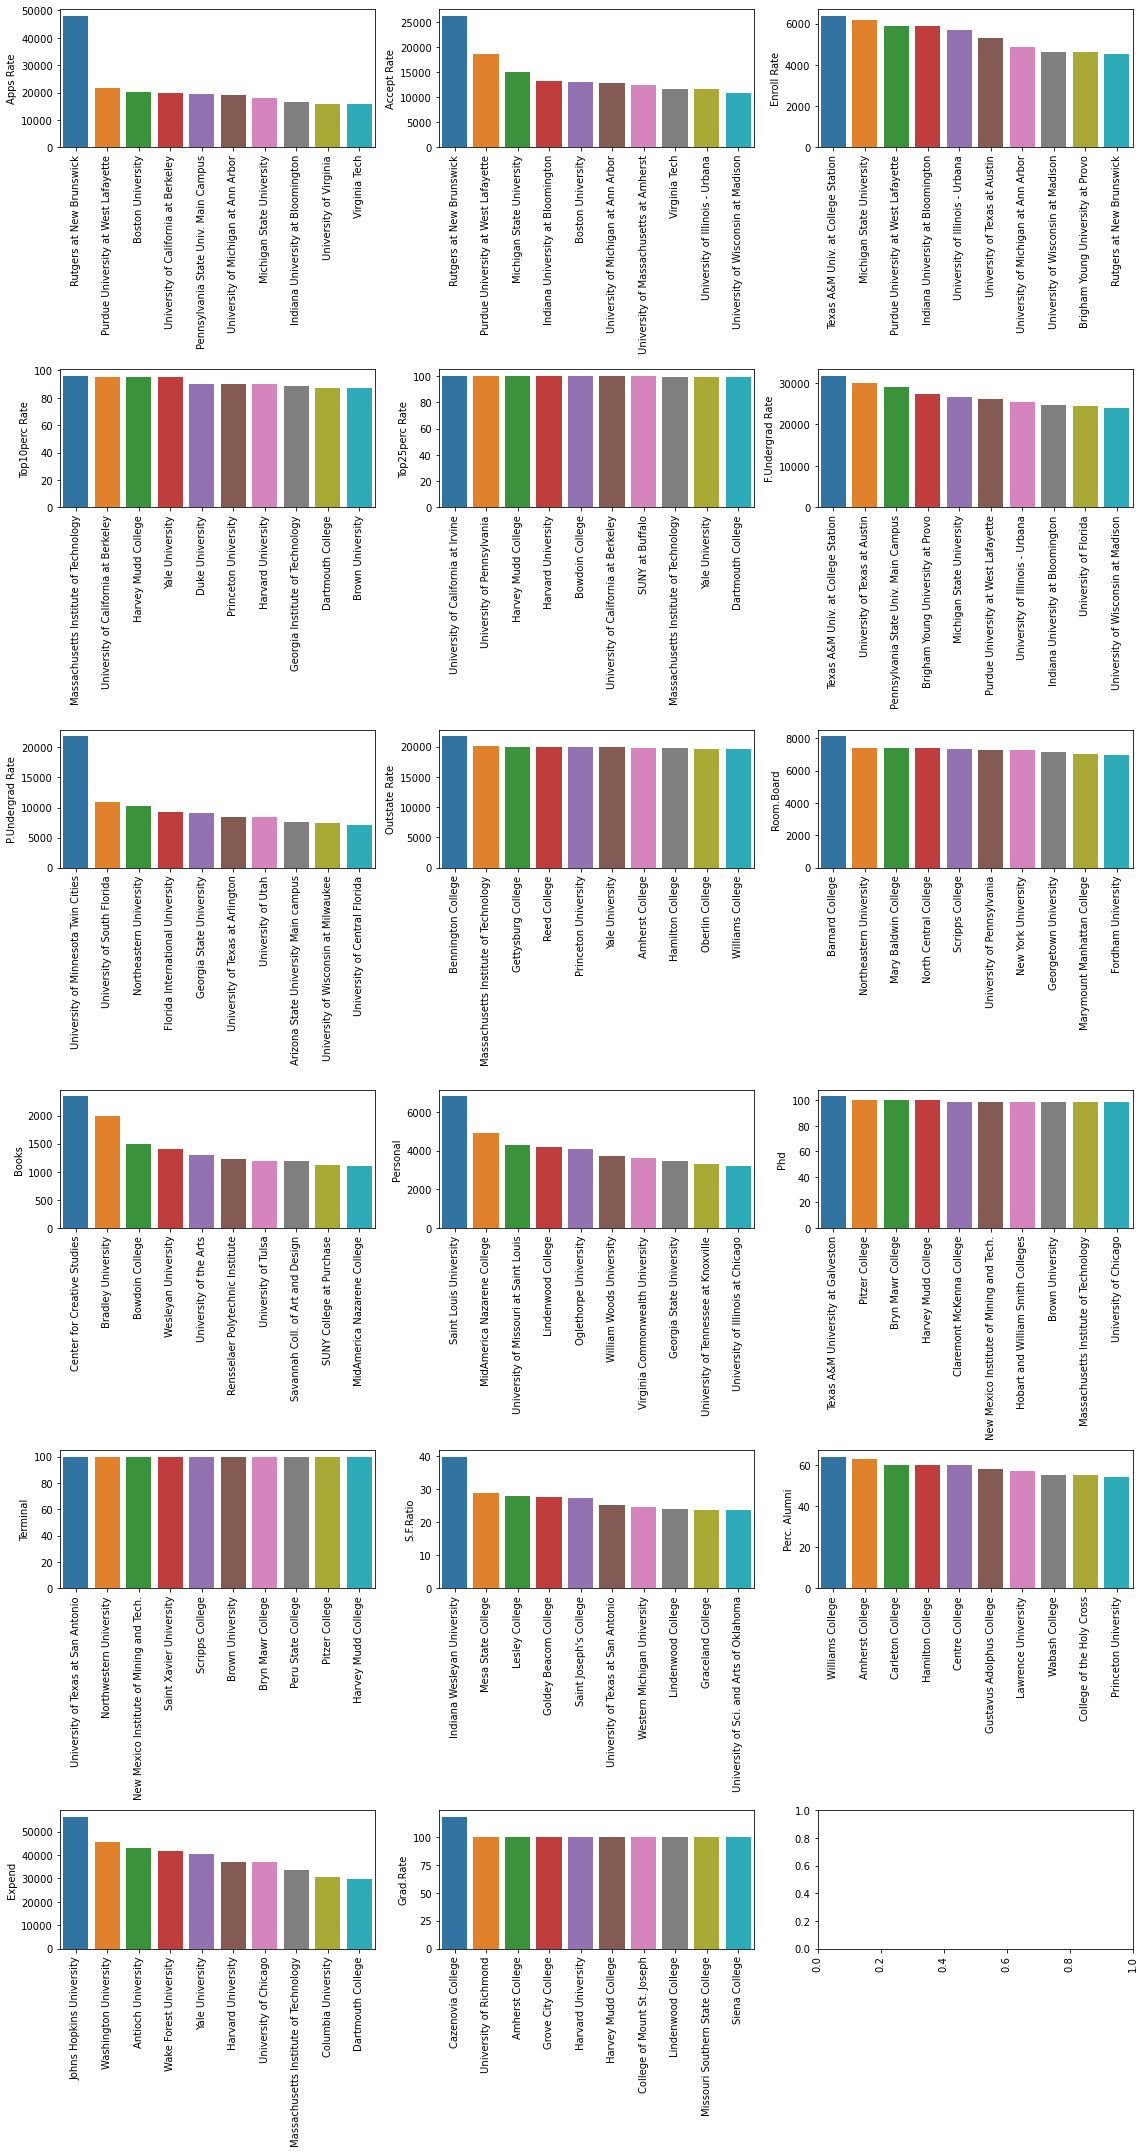

In [10]:
fig, axs = plt.subplots(6,3,figsize = (16,30))

# Apps Rate : Jumlah pendaftar tahun ini di setiap universitas

top10_apps = data[['University','Apps']].sort_values('Apps', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='Apps', data= top10_apps, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Apps Rate')

# Accept Rate : Top 10 jumlah pendaftar yang di terima di setiap Universitas
top10_accept = data[['University','Accept']].sort_values('Accept', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='Accept', data= top10_accept, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Accept Rate')

# Enroll Rate : Top 10 jumlah orang yang terdaftar sebagai mahasiswa di setiap Universitas
top10_enroll = data[['University','Enroll']].sort_values('Enroll', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='Enroll', data= top10_enroll, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Enroll Rate')

# Top10perc Rate : Top 10 persentase mahasiswa yang merupakan top10% dari SMA asal di setiap Universitas
top10_top10perc = data[['University','Top10perc']].sort_values('Top10perc', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='Top10perc', data= top10_top10perc, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Top10perc Rate')

# Top25perc Rate : Top 10 persentase mahasiswa yang merupakan top25% dari SMA asal di setiap Universitas
top10_top25perc = data[['University','Top25perc']].sort_values('Top25perc', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='Top25perc', data= top10_top25perc, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'Top25perc Rate')

# F.Undergrad Rate : Top 10 jumlah mahasiswa S1 full time di setiap Universitas
top10_fUndergrad = data[['University','F_Undergrad']].sort_values('F_Undergrad', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='F_Undergrad', data= top10_fUndergrad, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'F.Undergrad Rate')

# P.Undergrad Rate : Top 10 jumlah mahasiswa S1 part time di setiap Universitas
top10_pUndergrad = data[['University','P_Undergrad']].sort_values('P_Undergrad', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='P_Undergrad', data= top10_pUndergrad, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'P.Undergrad Rate')

# Outstate Rate : Top 10 biaya kuliah untuk mahasiswa non-lokal di setiap Universitas
top10_outstate = data[['University','Outstate']].sort_values('Outstate', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='Outstate', data= top10_outstate, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Outstate Rate')

# Room Board Rate : Top 10 biaya asrama di setiap Universitas
top10_roomboard = data[['University','Room_Board']].sort_values('Room_Board', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='Room_Board', data= top10_roomboard, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Room.Board')

# Books Rate : Top 10 estimasi biaya buku di setiap Universitas
top10_books = data[['University','Books']].sort_values('Books', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='Books', data= top10_books, ax = axs[3,0])
plt1.set(xlabel = '', ylabel= 'Books')

# Personal Rate : Top 10 estimasi biaya hidup di setiap Universitas
top10_personal = data[['University','Personal']].sort_values('Personal', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='Personal', data= top10_personal, ax = axs[3,1])
plt1.set(xlabel = '', ylabel= 'Personal')

# PhD Rate : Top 10 persentase dosen bergelar doktor di setiap Universitas
top10_PhD = data[['University','PhD']].sort_values('PhD', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='PhD', data= top10_PhD, ax = axs[3,2])
plt1.set(xlabel = '', ylabel= 'Phd')

# Terminal Rate : Top 10 persentase dosen yang memiliki gelar tertinggi di bidang masing-masing di setiap Universitas
top10_terminal = data[['University','Terminal']].sort_values('Terminal', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='Terminal', data= top10_terminal, ax = axs[4,0])
plt1.set(xlabel = '', ylabel= 'Terminal')

# S.F.Ratio Rate : Top 10 rasio mahasiswa/pengajar di setiap Universitas
top10_ratio = data[['University','S_F_Ratio']].sort_values('S_F_Ratio', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='S_F_Ratio', data= top10_ratio, ax = axs[4,1])
plt1.set(xlabel = '', ylabel= 'S.F.Ratio')

# perc.alumni Rate : Top 10 persentase alumni yang berdonasi untuk universitas di setiap universitas 
top10_perc = data[['University','perc_alumni']].sort_values('perc_alumni', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='perc_alumni', data= top10_perc, ax = axs[4,2])
plt1.set(xlabel = '', ylabel= 'Perc. Alumni')

# Expend Rate : Top 10 estimasi biaya pembelajaran per siswa di setiap universitas
top10_expend = data[['University','Expend']].sort_values('Expend', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='Expend', data= top10_expend, ax = axs[5,0])
plt1.set(xlabel = '', ylabel= 'Expend')

# Grad Rate : Top 10 tingkat kelulusan di setiap universitas
top10_grad = data[['University','Grad_Rate']].sort_values('Grad_Rate', ascending = False).head(10)
plt1 = sns.barplot(x='University', y='Grad_Rate', data= top10_grad, ax = axs[5,1])
plt1.set(xlabel = '', ylabel= 'Grad.Rate')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

Jika dilihat dari visualisasi diatas ada beberapa data pada suatu kolom universitas yang nilai nya lebih tinggi dibandingkan universitas yang lain, seperti jumlah pendaftar di Universitas Rutgers at New Brunswick lebih banyak dibandingkan universitas yang lain

#### Cek korelasi koefisien untuk melihat variabel mana yang korelasinya tinggi

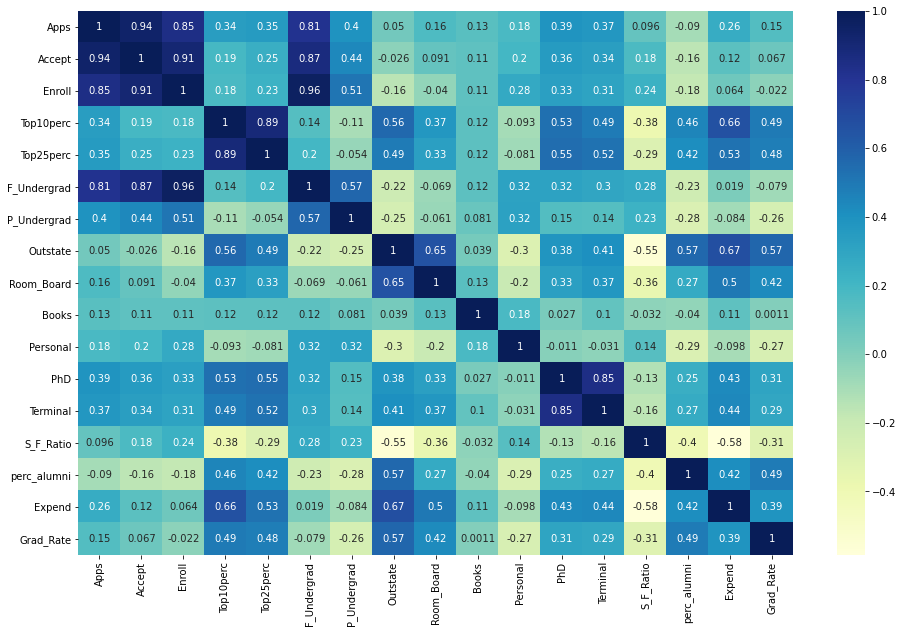

In [11]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

Dilihat dari korelasi diatas, variabel yang memiliki korelasi paling tinggi adalah Enroll dan F_Undergrad

## Outlier Analysist

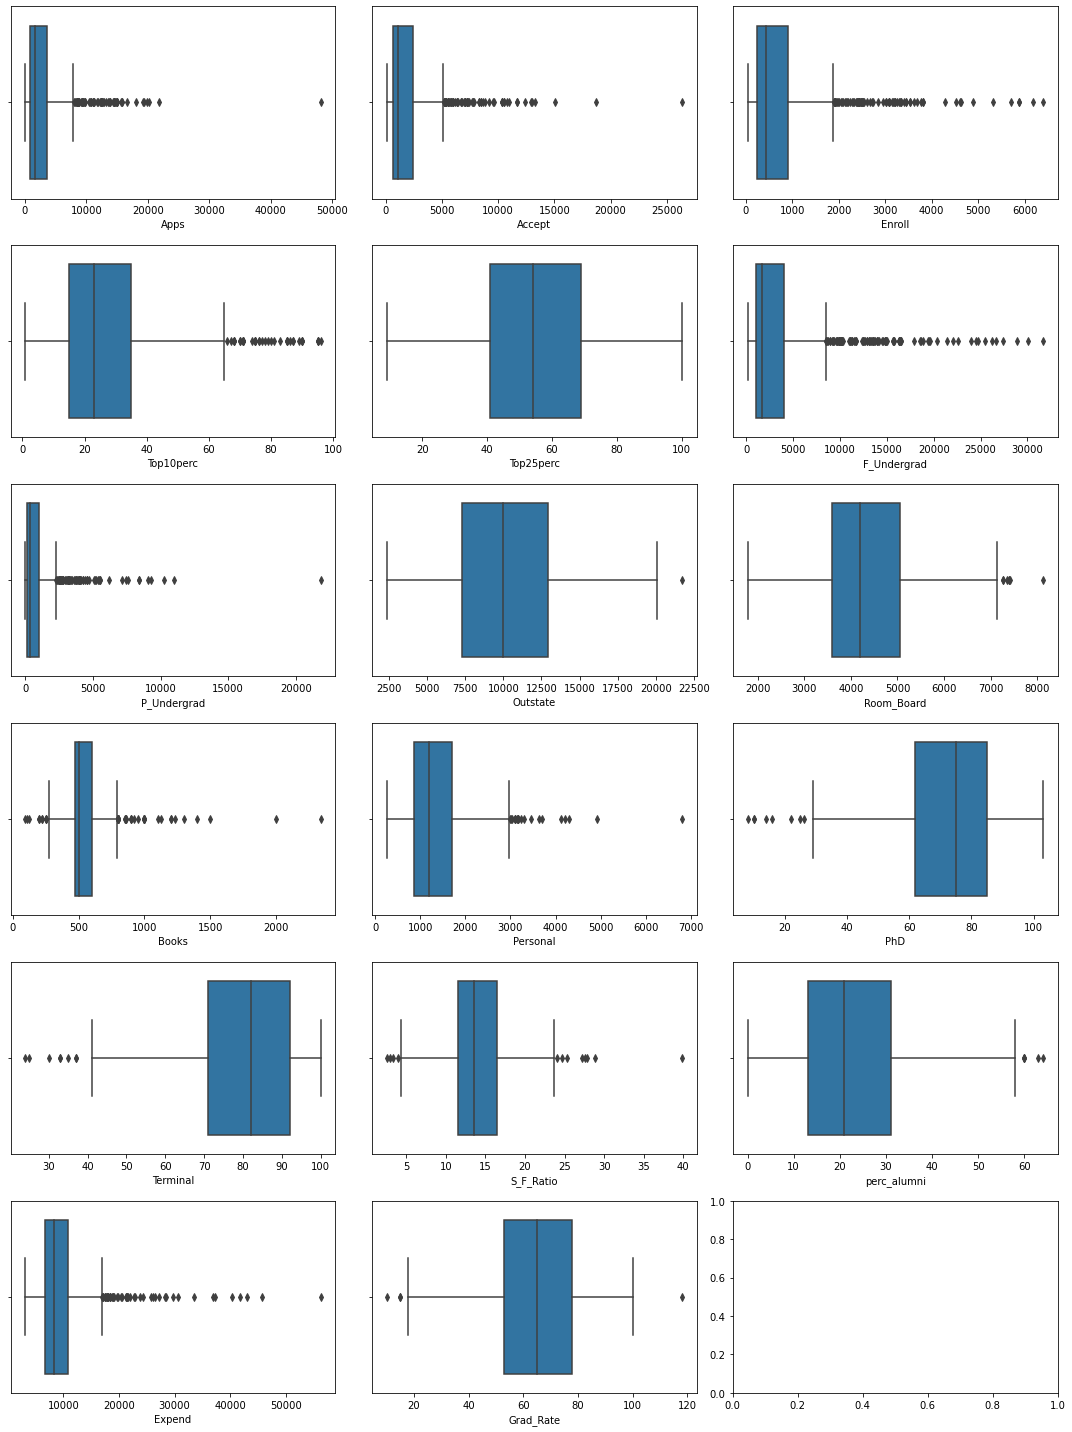

In [12]:
fig, axs = plt.subplots(6,3, figsize = (15,20))
plt1 = sns.boxplot(data['Apps'], ax = axs[0,0])
plt2 = sns.boxplot(data['Accept'], ax = axs[0,1])
plt3 = sns.boxplot(data['Enroll'], ax = axs[0,2])
plt4 = sns.boxplot(data['Top10perc'], ax = axs[1,0])
plt5 = sns.boxplot(data['Top25perc'], ax = axs[1,1])
plt6 = sns.boxplot(data['F_Undergrad'], ax = axs[1,2])
plt7 = sns.boxplot(data['P_Undergrad'], ax = axs[2,0])
plt8 = sns.boxplot(data['Outstate'], ax = axs[2,1])
plt9 = sns.boxplot(data['Room_Board'], ax = axs[2,2])
plt10 = sns.boxplot(data['Books'], ax = axs[3,0])
plt11 = sns.boxplot(data['Personal'], ax = axs[3,1])
plt12 = sns.boxplot(data['PhD'], ax = axs[3,2])
plt13 = sns.boxplot(data['Terminal'], ax = axs[4,0])
plt14 = sns.boxplot(data['S_F_Ratio'], ax = axs[4,1])
plt15 = sns.boxplot(data['perc_alumni'], ax = axs[4,2])
plt16 = sns.boxplot(data['Expend'], ax = axs[5,0])
plt17 = sns.boxplot(data['Grad_Rate'], ax = axs[5,1])

plt.tight_layout()
plt.show()

Disini kita lihat pada data tersebut apakah ada outlier atau tidak, dan di temukan outlier tetapi kita tidak akan menghilangkan atau mengubahnya karena tujuan kita adalah agar seluruh universitas dapat di cluster/dikelompokkan sesuai dengan karakteristik mereka masing-masing

## Data Preparation

### Encode Data

Pada tahapan ini kita akan melakukan encode data dapa kolom Private dengan menggunakan label encode, karena hanya terdapat 2 varian saja, yang dimana kalau 1 itu berarti merupakan universitas swasta, kalau 0 berarti bukan universitas swasta (negeri)

In [13]:
data['Private'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
label_encode = ['Private']

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for kolom in label_encode:
    data[kolom] = le.fit_transform(data[kolom])

In [16]:
data.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#### Kemudian kita copy data karena pada tahap selanjutnya kita akan men scaling data, agar data asli tetap ada

In [17]:
data2 = data.copy()

## Scaling the Data

Disini kita lakukan scaling untuk menyamakan range pada data numerik

In [49]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board',
           'Books', 'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni', 'Expend', 'Grad_Rate']

# Scale these variables using 'fit_transform'
data[varlist] = scaler.fit_transform(data[varlist])
data

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,Adelphi University,1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,Adrian College,1,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,Agnes Scott College,1,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,Alaska Pacific University,1,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,0,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781,-1.483301
773,Xavier University,1,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290,1.021555
774,Xavier University of Louisiana,1,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241,-0.959029
775,Yale University,1,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971,1.953595


Tahap selanjutnya kita akan melakukan PCA, yang dimana PCA adalah teknik yang digunakan untuk menyederhanakan suatu data, dengan cara mentransformasi data secara linier sehingga terbentuk sistem koordinat baru dengan varians maksimum. Jadi suatu dataset dapat digambarkan oleh beberapa variabel saja

## PCA on the Data

In [19]:
# Putting feature variable to X
X = data.drop(['University'], axis=1)

# Putting UNIVERSITY
university = data['University']

In [20]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [21]:
#Doinig the PCA on the train data

pca.fit(X)

PCA(random_state=42)

Kemudian kita cek komponen yang terdapat di PCA

## PCA Component

In [22]:
pca.components_

array([[ 1.70468976e-02,  2.44752514e-01,  2.03143010e-01,
         1.71407717e-01,  3.55148921e-01,  3.44404948e-01,
         1.49546938e-01,  2.26625064e-02,  2.97876428e-01,
         2.50789754e-01,  6.41642242e-02, -4.51157205e-02,
         3.17323613e-01,  3.16227414e-01, -1.80015570e-01,
         2.08019496e-01,  3.20443748e-01,  2.54362369e-01],
       [-1.54759912e-01,  3.30487906e-01,  3.69515277e-01,
         4.00956880e-01, -7.57020473e-02, -3.84769691e-02,
         4.14790529e-01,  3.11121379e-01, -2.44251362e-01,
        -1.34099188e-01,  5.54110631e-02,  2.15841230e-01,
         6.46466456e-02,  5.27052236e-02,  2.42269586e-01,
        -2.40493044e-01, -1.25541686e-01, -1.64048280e-01],
       [ 4.38611929e-02, -5.39863199e-02, -9.12129482e-02,
        -7.57701932e-02,  3.10361602e-02, -2.89969400e-02,
        -5.56331425e-02,  1.41075215e-01,  4.95943754e-02,
         1.54087586e-01,  6.77197163e-01,  4.96619990e-01,
        -1.38805469e-01, -7.75270448e-02, -2.91205416e

Tahap selanjutnya kita buat dataframe dari kolom list yang PCA nya kita ambil dari 0 dan 1 saja

In [23]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,0.017047,-0.154760,Private
1,0.244753,0.330488,Apps
2,0.203143,0.369515,Accept
3,0.171408,0.400957,Enroll
4,0.355149,-0.075702,Top10perc
5,0.344405,-0.038477,Top25perc
6,0.149547,0.414791,F_Undergrad
7,0.022663,0.311121,P_Undergrad
8,0.297876,-0.244251,Outstate
9,0.250790,-0.134099,Room_Board


## Choose Number of PC

In [24]:
#Eigenvalue
pca.explained_variance_

array([5.45190555, 4.59152635, 1.17673169, 1.01648547, 0.93480328,
       0.84864198, 0.60719569, 0.58797353, 0.53086176, 0.40459014,
       0.31388518, 0.22803426, 0.16779529, 0.14400522, 0.08804187,
       0.06952592, 0.03555976, 0.02300023])

In [25]:
#Proportion
pca.explained_variance_ratio_

array([0.31659276, 0.26663044, 0.06833294, 0.05902742, 0.05428413,
       0.04928073, 0.03525992, 0.03414369, 0.0308272 , 0.02349459,
       0.01822735, 0.01324197, 0.00974389, 0.0083624 , 0.0051126 ,
       0.00403738, 0.00206496, 0.00133563])

Selanjutnya kita buat screeplot untuk memplot kumulatif varians terhadap jumlah komponen

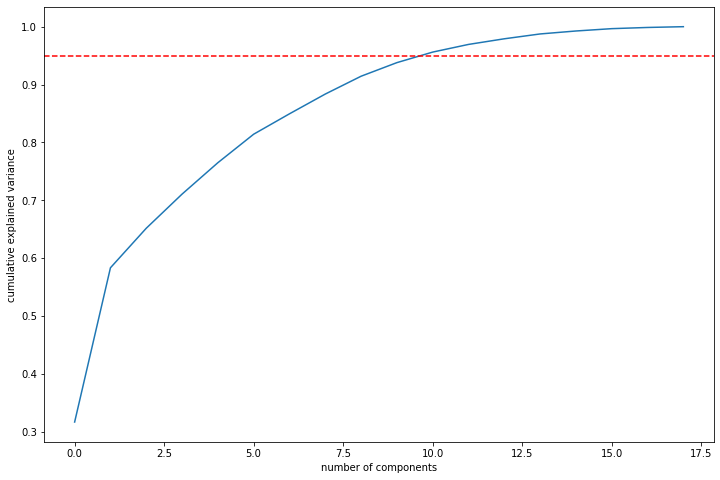

In [26]:
plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.axhline(y=0.95, color='red', linestyle='--')
plt.show()

#### Dari kurva tersebut kita pilih komponen yang dikiranya sudah cukup untuk mendescribe 95% dari varians pada dataset
Sehingga kita pilih 9 komponen untuk model

In [27]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
pca_final= PCA(n_components=9,random_state=42)

#### Basis transformation - getting the data onto our PCs

In [28]:
df_pca = pca_final.fit_transform(X)

In [29]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8
0,-1.597508,0.696392,-0.103848,-0.887443,-0.703297,-0.314767,0.655178,-0.883174,0.104905
1,-2.178395,-0.666978,2.374312,3.560526,0.950467,-0.145814,0.204147,0.034702,1.097220
2,-1.412546,-1.144900,-0.418256,0.690639,-0.381654,-0.959004,-0.240601,0.314196,-0.102125
3,2.890942,-2.592994,0.094833,-1.327503,-0.152865,-1.063734,-1.248743,-0.121201,0.388827
4,-2.207216,-0.052375,2.370356,-1.140547,0.708368,0.002930,-2.151939,-0.575292,-0.132247


#### Selanjutnya kita buat correlation matrix untuk membuktikan tidak adanya correlation antar satu sama lain setelah kita buat komponen PCA, karena jangan sampai komponen PCA yang dibuat tadi ada korelasinya

<AxesSubplot:>

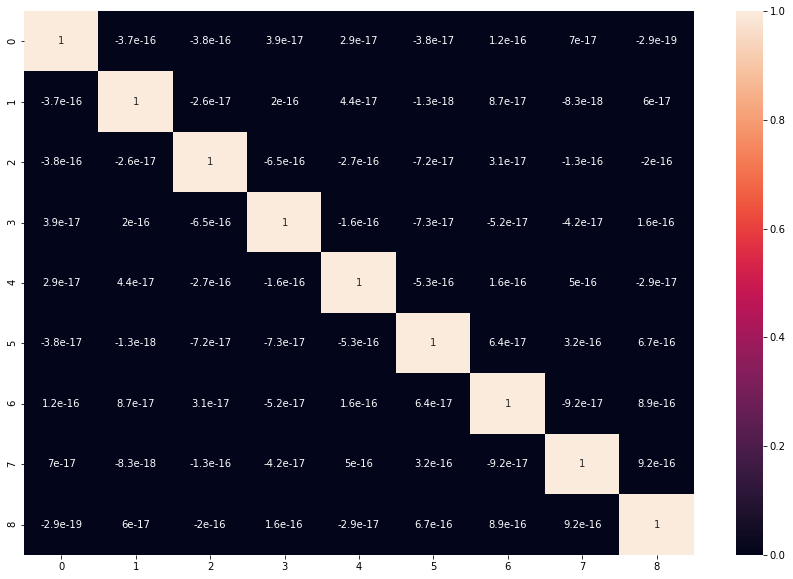

In [30]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (15,10))
sns.heatmap(df_pca.corr(),annot = True)

## Hierarchical Clustering

#### Selanjutnya kita build Dendrogram untuk melihat berapa cluster yang bisa kita ambil

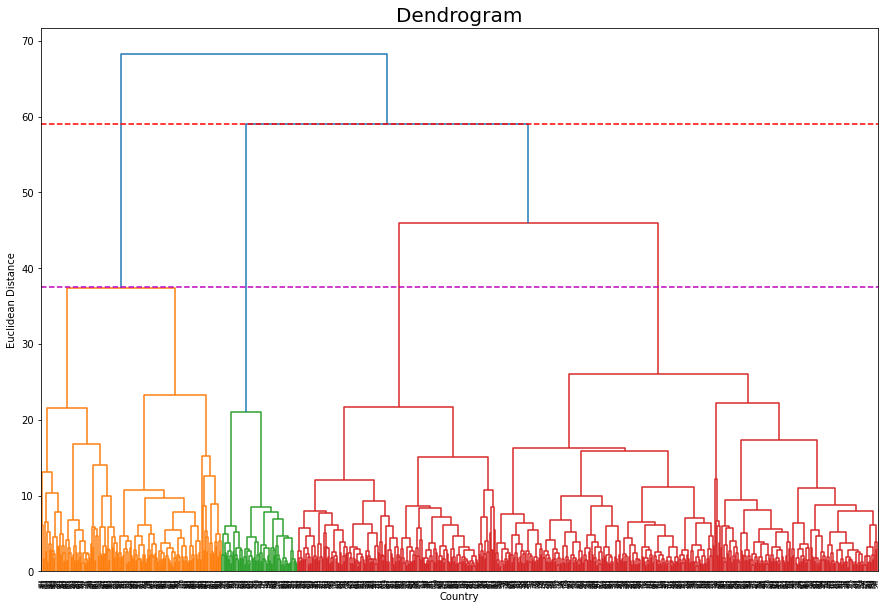

In [31]:
plt.figure(figsize=(15,10))
cluster = linkage(df_pca, method = 'ward', metric='euclidean')
dendrogram = dendrogram(cluster)
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Euclidean Distance')
plt.axhline(y=59, color='red', linestyle='--')
plt.axhline(y=37.5, color='m', linestyle='--')
plt.show()

#### Dilihat dari Dendrogram diatas kita dapat memilih jumlah cluster yang diambil dari garis terpanjang yaitu 3

Selanjutkan kita buat modeling Hierarchical Clustering yang dimana n_cluster nya = 3

In [32]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster_hc = hc.fit_predict(df_pca)

In [33]:
#Kita tambahkan hasil cluster ke dalam DataFrame
df_pca['cluster']=cluster_hc

In [34]:
#Setelah itu lakukan Merge University and Cluster
pca_cluster_hc = pd.concat([data['University'],df_pca['cluster']], axis=1, join='outer')
pca_cluster_hc.head()

,University,cluster
0,Abilene Christian University,1
1,Adelphi University,0
2,Adrian College,0
3,Agnes Scott College,2
4,Alaska Pacific University,0


#### Selanjutnya kita merge lagi dengan data asli yang sudah kita copy tadi dengan nama data2 kedalam clustered_data_hc

In [35]:
clustered_data_hc = pca_cluster_hc.merge(data2, on = 'University')
clustered_data_hc.head()

,University,cluster,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,0,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,0,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,2,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,0,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#### Setelah itu kita cek karakteristik dari setiap variable yang terdapat pada setiap cluster

In [36]:
hasil=clustered_data_hc.groupby(['cluster']).agg({"Apps":"mean","Accept":"mean","Enroll":"mean","Top10perc":"mean",
                                                  "Top25perc":"mean","F_Undergrad":"mean","P_Undergrad":"mean","Outstate":"mean",
                                                  "Room_Board":"mean","Books":"mean","Personal":"mean","PhD":"mean",
                                                  "Terminal":"mean","S_F_Ratio":"mean","perc_alumni":"mean","Expend":"mean",
                                                  "Grad_Rate":"mean"}).reset_index()
hasil

,cluster,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,0,1378.604824,1036.478664,380.946197,23.474954,50.955473,1605.307978,467.022263,10383.734694,4312.834879,540.593692,1254.886827,67.786642,75.547310,13.930056,22.703154,8667.641929,64.927644
1,1,7503.541667,5130.333333,2082.023810,26.005952,57.714286,10796.809524,2394.982143,7695.815476,3993.386905,570.023810,1762.589286,80.589286,86.386905,16.572619,15.077381,8446.583333,58.380952
2,2,4694.428571,2115.042857,727.557143,62.728571,88.471429,2795.757143,149.785714,17466.714286,5575.585714,567.500000,988.285714,91.157143,95.657143,9.360000,41.457143,20215.257143,86.585714


#### Berdasarkan data diatas, dapat disimpulkan bahwa 
- Cluster 1 : Universitas yang biasa saja / umum
- Cluster 2 : Jumlah pendaftar dan orang yang diterima paling tinggi (Universitas Paling diminati)
- Cluster 3 : Universitas yang biaya pembelajarannya nya mahal, memiliki dosen dengan gelar tertinggi (Universitas Elite)

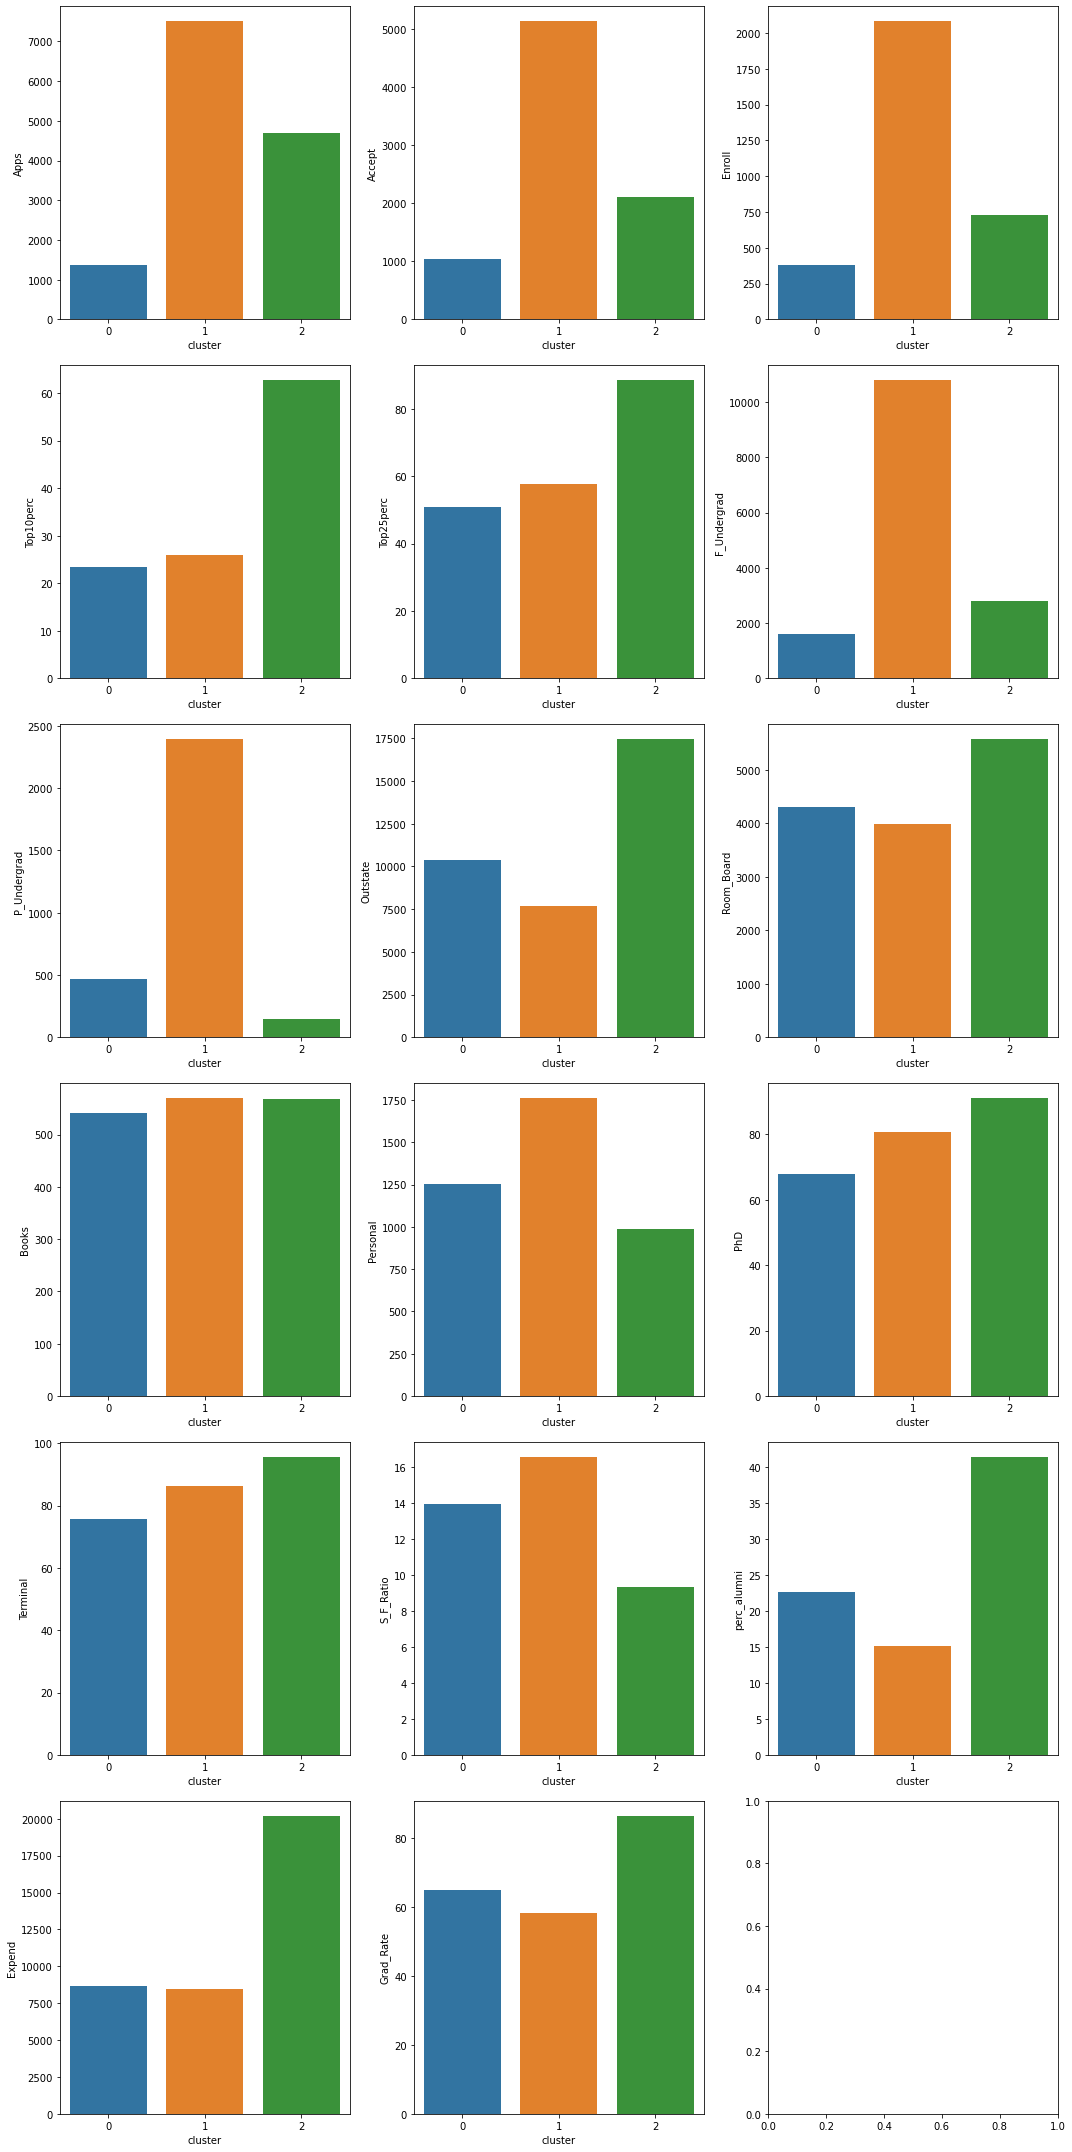

In [37]:
fig, axs = plt.subplots(6,3,figsize = (15,30))

sns.barplot(x=hasil.cluster, y=hasil.Apps, ax = axs[0,0])
sns.barplot(x=hasil.cluster, y=hasil.Accept, ax = axs[0,1])
sns.barplot(x=hasil.cluster, y=hasil.Enroll, ax = axs[0,2])
sns.barplot(x=hasil.cluster, y=hasil.Top10perc, ax = axs[1,0])
sns.barplot(x=hasil.cluster, y=hasil.Top25perc, ax = axs[1,1])
sns.barplot(x=hasil.cluster, y=hasil.F_Undergrad, ax = axs[1,2])
sns.barplot(x=hasil.cluster, y=hasil.P_Undergrad, ax = axs[2,0])
sns.barplot(x=hasil.cluster, y=hasil.Outstate, ax = axs[2,1])
sns.barplot(x=hasil.cluster, y=hasil.Room_Board, ax = axs[2,2])
sns.barplot(x=hasil.cluster, y=hasil.Books, ax = axs[3,0])
sns.barplot(x=hasil.cluster, y=hasil.Personal, ax = axs[3,1])
sns.barplot(x=hasil.cluster, y=hasil.PhD, ax = axs[3,2])
sns.barplot(x=hasil.cluster, y=hasil.Terminal, ax = axs[4,0])
sns.barplot(x=hasil.cluster, y=hasil.S_F_Ratio, ax = axs[4,1])
sns.barplot(x=hasil.cluster, y=hasil.perc_alumni, ax = axs[4,2])
sns.barplot(x=hasil.cluster, y=hasil.Expend, ax = axs[5,0])
sns.barplot(x=hasil.cluster, y=hasil.Grad_Rate, ax = axs[5,1])
plt.tight_layout()

In [38]:
clustered_data_hc[clustered_data_hc.cluster == 0].University.values

array(['Adelphi University', 'Adrian College',
       'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College', 'Alfred University',
       'Allegheny College', 'Allentown Coll. of St. Francis de Sales',
       'Alma College', 'Alverno College',
       'American International College', 'Anderson University',
       'Andrews University', 'Angelo State University',
       'Antioch University', 'Aquinas College',
       'Arkansas College (Lyon College)', 'Arkansas Tech University',
       'Assumption College', 'Augsburg College', 'Augustana College IL',
       'Augustana College', 'Austin College', 'Averett College',
       'Baker University', 'Baldwin-Wallace College', 'Barat College',
       'Barry University', 'Beaver College', 'Bellarmine College',
       'Belmont Abbey College', 'Belmont University', 'Beloit College',
       'Bemidji State University', 'Benedictine College',
       'Be

In [39]:
clustered_data_hc[clustered_data_hc.cluster == 1].University.values

array(['Abilene Christian University', 'Appalachian State University',
       'Arizona State University Main campus',
       'Auburn University-Main Campus', 'Baylor University',
       'Bloomsburg Univ. of Pennsylvania', 'Boston University',
       'Bowling Green State University',
       'Brigham Young University at Provo',
       'California Polytechnic-San Luis',
       'California State University at Fresno',
       'Central Missouri State University',
       'Central Washington University', 'Clemson University',
       'College of Charleston', 'Colorado State University',
       'East Carolina University', 'East Tennessee State University',
       'Eastern Connecticut State University',
       'Eastern Illinois University', 'Elon College',
       'Evergreen State College', 'Florida International University',
       'Florida State University', 'George Mason University',
       'George Washington University', 'Georgia Institute of Technology',
       'Georgia State University', 'Gr

In [40]:
clustered_data_hc[clustered_data_hc.cluster == 2].University.values

array(['Agnes Scott College', 'Amherst College', 'Bard College',
       'Barnard College', 'Brown University', 'Bryn Mawr College',
       'Bucknell University', 'Carleton College',
       'Carnegie Mellon University', 'Case Western Reserve University',
       'Centre College', 'Claremont McKenna College', 'Colby College',
       'Colgate University', 'College of the Holy Cross',
       'College of William and Mary', 'Colorado College',
       'Columbia University', 'Connecticut College', 'Dartmouth College',
       'Davidson College', 'Drew University', 'Duke University',
       'Emory University', 'Georgetown University', 'Gettysburg College',
       'Grinnell College', 'Gustavus Adolphus College',
       'Hamilton College', 'Harvard University', 'Harvey Mudd College',
       'Johns Hopkins University', 'Kenyon College',
       'Lawrence University', 'Lehigh University',
       'Massachusetts Institute of Technology', 'Mount Holyoke College',
       'Northwestern University', 'Oberli

## K-Means Clustering

In [41]:
#Copy Data
df = data2.copy()
df.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#### Pada tahap ini kita pilih kolom apa yang ingin kita cluster, disini saya memilih kolom apps dan accept untuk mencluster universitas yang diminati oleh pendaftar

In [42]:
X = df.iloc[:, [2,3]].values

### Elbow Method

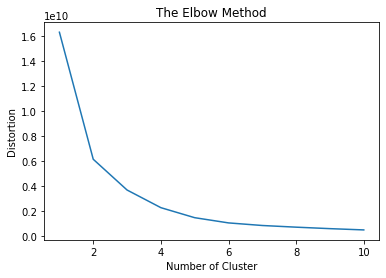

In [43]:
from sklearn.cluster import KMeans

distortion = []

for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    distortion.append(kmeans.inertia_)
    
plt.plot(range(1,11), distortion)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Distortion')
plt.show()

Kita Pilih 3 karena di titik 3 penurunan nya suda tidak terlalu signifikan

In [44]:
#selanjutnya kita lakukan modeling

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [45]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Setelah kita lakukan modeling, maka sudah di temukan cluster-cluster nya sehingga kita masukkan ke dalam variabel baru yang dinamakan cluster

In [46]:
df['cluster'] = y_kmeans
df.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,cluster
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


Selanjutnya kita cek data dari X yang dimana isinya adalah data pendaftar universitas di tahun ini dengan data jumlah orang yang di terima, kemudian kita filter ketika X[y_kmeans==0, 0] yang berarti masuk kedalam cluster 0 untuk kolom 0 dimana 0 merupakan kolom Apps 

In [47]:
X[y_kmeans==0, 0]

array([1660, 2186, 1428,  417,  193,  587,  353, 1899, 1038,  582, 1732,
       2652, 1179, 1267,  494, 1420, 4302, 1216, 1130, 3540,  713,  619,
        708, 1734, 2135,  662, 1879,  761,  948,  627,  602, 1690,  261,
       1910, 2496,  990, 1163,  807,  632, 1220, 1320, 1208,  632,  519,
       3466, 1858,  878,  202,  502, 1646,  805,  500,  377,  692, 3356,
        443,  367, 1436,  392,  838, 1465,  860, 2362,  599, 1011,  563,
       1784, 2087,  848, 2853, 1747,  100, 2694, 1160, 1096, 1616, 1257,
       1083, 1754,  776, 1307,  369,  495,  601, 1283, 2785,  174, 1013,
        959,  212,  342,   81,  880,  883, 1196, 1860, 2887,  460, 2174,
        689, 1006,  604, 2848, 1432,  798,  946,  344,  457,  938,  511,
        444,  983,  546,  141,  672, 2994, 2100, 3207,  314,  737,  281,
        232,  688,  528, 3035,  440, 1538, 2967, 1576,  995,  866,  504,
        585, 2373,  571,  967, 2762, 1994, 3014,  434, 1998,  793,  360,
        604, 1011, 2799, 2153,  700, 1358, 3330,  3

#### Selanjutnya kita buat visualisasi menggunakan scatter plot untuk melihat isi dari setiap clusternya

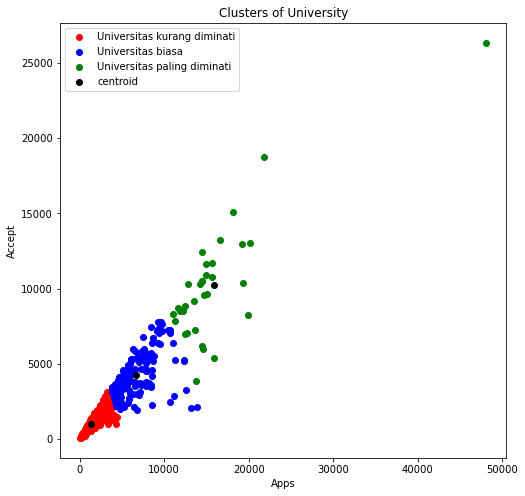

In [48]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], c='red', label='Universitas kurang diminati')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], c='blue', label='Universitas biasa')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], c='green', label='Universitas paling diminati')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c='black', label='centroid')
plt.title('Clusters of University') 
plt.xlabel('Apps')
plt.ylabel('Accept')
plt.legend()
plt.show()